Wir definieren zunächst die symmetrische Faltung zweier Vektoren. Wir lassen zu, dass der zweite Vektor kürzer ist als der erste, in diesem Fall wird mit Nullen aufgefüllt.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def symconv(y,z):
    n=len(y)
    m=len(z)
    if (m<n):
        z1=np.zeros(n)
        z1[0:m]=z
        z=z1
    x=np.zeros(n)
    for i in range(0,n):
        sum=0
        for k in range(0,n):
            sum=sum+y[k]*z[(i-k)%n]
        x[i]=sum
    return x

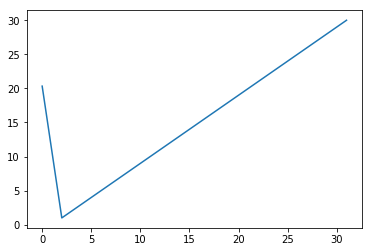

In [3]:
n=32
m=3
y=np.array(range(0,n))
z=np.zeros(n)
z[0:m]=np.ones(m)/m
x=symconv(y,z)
plt.plot(x)

Jetzt realisiert mit der Fouriertransformierten. Wir nutzen die Implementation der FT von python.

In [4]:
def fftconv(y,z):
    n=len(y)
    m=len(z)
    print(n,m)
    if (m<n):
        z1=np.zeros(n)
        z1[0:m]=z
        z=z1
    ydach=np.fft.fft(y)
    zdach=np.fft.fft(z)
    xdach=ydach*zdach
    x=np.fft.ifft(xdach)
    return x

In [5]:
x1=fftconv(y,z)
x1=x1.real
print(np.linalg.norm(x1-x))

32 32
1.2970142174948615e-14


Ok, das liefert das gleiche Ergebnis. Wir versuchen nun, aus dem Vektor $x$ den Vektor $y$ zurückzugewinnen wie in der Vorlesung.

7.363850801373718e-14


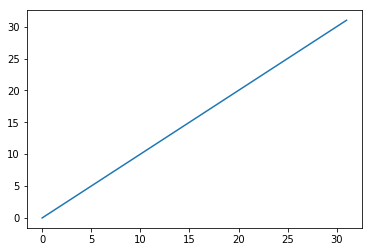

In [6]:
xdach=np.fft.fft(x)
zdach=np.fft.fft(z)
ydach=xdach/zdach
y1=np.fft.ifft(ydach)
y1=y1.real
plt.plot(y1)
print(np.linalg.norm(y-y1))

Super - das hat wunderbar funktioniert. Wir nehmen nun mal an, dass die Werte von x einen kleinen Fehler haben und wiederholen das Experiment.

In [7]:
xnoisy=x+1e-2*np.random.normal(size=x.shape)
print(np.linalg.norm(xnoisy-x))

0.050548123445062584


0.4091793713875028


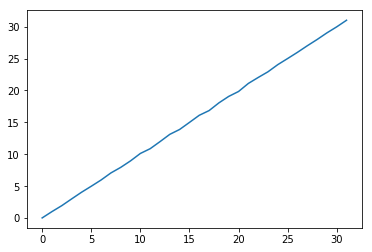

In [8]:
xnoisydach=np.fft.fft(xnoisy)
zdach=np.fft.fft(z)
ydach=xnoisydach/zdach
y1=np.fft.ifft(ydach)
y1=y1.real
plt.plot(y1)
print(np.linalg.norm(y-y1))

Auch das hat funktioniert. Wir nutzen jetzt einen Faltungsvektor, wie er auch in der Signalverarbeitung zur Glättung genutzt wird.

In [ ]:
h